#### **Introduction**

This small project focuses on (and serves as an example of) leveraging the value of metabolic profiles and related calculations created in a a novel 10,000 individual synthetic dataset.  User input creates a simple gender/ age/  weight/ height status which is then compared to the average risk profile for a similar cohort in the synthetic dataset. A previously created novel health risk calculation is employed to serve as the key data point in assigning a scaled metric that provides perspective on metabolic risk. This greatly expands upon the binary Metabolic Syndrome classification. The user is then asked to provide  weight loss or gain variable input to calculate change in calculated status incorporating this change. Changes to BMI status, number of risk factors and changes to the health risk score are provided (along with a bar graph for visualization). This is only one example of how individual metrics can be leveraged with comparison to large dataset profiles and related analysis. 



#### **Importing Essential Libraries**
I imported two fundamental libraries for data analysis and manipulation in Python: pandas and numpy. Pandas provides data structures and functions for efficiently handling structured data, including tabular data such as spreadsheets and SQL tables. Numpy offers support for large, multi-dimensional arrays and matrices, and is the foundation of most scientific computing in Python. These libraries will be used extensively throughout this project for data loading, manipulation, and analysis.


In [228]:
import pandas as pd
import numpy as np

#### **Loading Synthetic Metabolic Data**

We load the previously created synthetic metabolic dataset from a CSV file into a pandas DataFrame for analysis and manipulation.

In [229]:
df_adult = pd.read_csv('/Users/steventuschman/Desktop/df_adult_updated.csv')

#### **Exploring Synthetic Metabolic Data**

I explore the synthetic metabolic data by previewing the first few rows, examining dataset information, and generating summary statistics. This provides a comprehensive overview of the data's structure, content, and distribution, helping us understand the characteristics of the dataset. 

In [230]:
print(df_adult.head())  # Display the first few rows
print(df_adult.info())  # Display dataset information
print(df_adult.describe())  # Display summary statistics

   Age  Gender   BMI  Waist_Circumference  Fasting_Blood_Glucose BMI_Category  \
0   30  Female  24.9                 27.0                     97       Normal   
1   24    Male  28.0                 33.1                     82   Overweight   
2   79    Male  30.9                 54.6                    136        Obese   
3   75    Male  32.4                 57.2                    296        Obese   
4   65    Male  34.2                 50.4                     73        Obese   

   Triglycerides  HDL_Cholesterol  High_Blood_Pressure  Metabolic_Syndrome  \
0            139               36                    0               False   
1             52               42                    0               False   
2            268               58                    0                True   
3            181               56                    1                True   
4            128               58                    1               False   

   Risk_Factors  BMI_Rounded  Age_Rounded  C

#### **Collecting User Information**


We prompt the user to enter their personal details, including gender, age, height, and weight. This information will be used to calculate their BMI and determine their average risk score. The user is asked to input their gender as either Male or Female, age in years, height in inches, and weight in pounds. This data is stored in the gender, age, height, and weight variables for further processing.

In [231]:
# Get user input for gender, age, height, and weight
gender = input("Enter your gender (M/F): ")
age = int(input("Enter your age: "))
height = float(input("Enter your height in inches: "))
weight = float(input("Enter your weight in pounds: "))

# Convert user's height and weight to metric units
height_meters = height * 0.0254
weight_kg = weight * 0.453592

# Calculate user's Body Mass Index (BMI)
bmi = weight_kg / (height_meters ** 2)

# Display summary of user's entered information
print(f"You entered: Gender - {gender}, Age - {age}, Height - {height} inches, Weight - {weight} pounds")
print(f"Your calculated BMI is: {bmi:.2f}")

# Store user data for further analysis
user_gender = 'Male' if gender == 'M' else 'Female'
user_age = age
user_bmi = bmi

You entered: Gender - M, Age - 61, Height - 71.0 inches, Weight - 267.0 pounds
Your calculated BMI is: 37.24


#### **Cohort Comparison** 

We now identify a cohort of individuals from the dataset who are comparable to the user based on gender, age, and Body Mass Index (BMI). Cophort definition includes  BMI within ±1 of the user's rounded BMI, and an age within ±1 year of the user's age. For the identified cohort, we calculate the average Health Risk Score, Converted Risk Score, and the average number of Risk Factors. The average Converted Risk Score is categorized into risk levels: No Risk, Low Risk, Moderate Risk, High Risk, and Very High Risk. The accompanying code block implements this analysis, providing the cohort results along with debug information to verify the filtering process.

In [232]:
import pandas as pd
import numpy as np

def get_risk_category(score):
    if pd.isna(score):
        return "Unable to determine (No matching cohort)"
    score = int(score)
    if score == 0:
        return "No Risk"
    elif 1 <= score <= 22:
        return "Low Risk"
    elif 23 <= score <= 44:
        return "Moderate Risk"
    elif 45 <= score <= 67:
        return "High Risk"
    else:
        return "Very High Risk"

# Use the stored user data
user_bmi_rounded = round(user_bmi)

# Debug: Print user input details
print(f"User Gender: {user_gender}")
print(f"User Age: {user_age}")
print(f"User BMI: {user_bmi:.2f} (Rounded: {user_bmi_rounded})")

# Filter the dataset for the cohort
cohort = df_adult[
    (df_adult['Gender'] == user_gender) &
    (df_adult['BMI_Rounded'].between(user_bmi_rounded - 1, user_bmi_rounded + 1)) &
    (df_adult['Age'].between(user_age - 1, user_age + 1))
]

# Calculate the required metrics
cohort_size = len(cohort)

if cohort_size > 0:
    avg_health_risk_score = cohort['Health_Risk_Score'].mean()
    avg_converted_risk_score = cohort['Converted_Risk_Score'].mean()
    avg_risk_factors = cohort['Risk_Factors'].mean()
    risk_category = get_risk_category(avg_converted_risk_score)
else:
    avg_health_risk_score = avg_converted_risk_score = avg_risk_factors = np.nan
    risk_category = "Unable to determine (No matching cohort)"

# Print the results
print(f"Cohort Analysis Results:")
print(f"Number of comparables in cohort: {cohort_size}")

if cohort_size > 0:
    print(f"Average Health Risk Score: {avg_health_risk_score:.2f}")
    print(f"Average Converted Risk Score: {avg_converted_risk_score:.2f}")
    print(f"Risk Category: {risk_category}")
    print(f"Average Number of Risk Factors: {avg_risk_factors:.2f}")
else:
    print("No matching cohort found. Unable to provide comparative analysis.")

# Debug information
print("\nDebug Information:")
print(f"User Gender: {user_gender}")
print(f"User Age: {user_age}")
print(f"User BMI: {user_bmi:.2f} (Rounded: {user_bmi_rounded})")
print(f"Gender match count: {len(df_adult[df_adult['Gender'] == user_gender])}")
print(f"BMI range match count: {len(df_adult[df_adult['BMI_Rounded'].between(user_bmi_rounded - 1, user_bmi_rounded + 1)])}")
print(f"Age range match count: {len(df_adult[df_adult['Age'].between(user_age - 1, user_age + 1)])}")

User Gender: Male
User Age: 61
User BMI: 37.24 (Rounded: 37)
Cohort Analysis Results:
Number of comparables in cohort: 18
Average Health Risk Score: 8.56
Average Converted Risk Score: 47.61
Risk Category: High Risk
Average Number of Risk Factors: 3.06

Debug Information:
User Gender: Male
User Age: 61
User BMI: 37.24 (Rounded: 37)
Gender match count: 4989
BMI range match count: 599
Age range match count: 410


#### **Cohort Analysis**

This code segment performs a cohort analysis to compare health metrics before and after a weight change. It starts by importing necessary libraries: pandas, numpy, and matplotlib. The get_risk_category function categorizes the risk score into various risk levels. The perform_cohort_analysis function filters the dataset based on gender, age, and BMI, and calculates the average health risk score, converted risk score, and number of risk factors for the cohort.
The original user data is printed, including gender, age, height, weight, and BMI. The cohort analysis is performed for the original profile, and the results are printed, including the number of comparables in the cohort, average health risk score, average converted risk score, risk category, and average number of risk factors.
Next, the user is prompted to enter a weight change (negative for loss, positive for gain) in pounds. The new weight and BMI are calculated, and the new profile is printed, including gender, age, height, new weight, and new BMI. The cohort analysis is performed for the new profile, and the results are printed.
The original and new profiles are compared, showing the changes in weight, BMI, health risk score, converted risk score, and number of risk factors. A bar graph is created to visualize the comparison of health metrics before and after the weight change. The percentage changes for BMI, number of risk factors, and converted risk score are calculated and printed.

Original Profile:
Gender: Male
Age: 61
Height: 71.0 inches
Weight: 267.0 pounds
BMI: 37.24
Number of comparables in cohort: 18
Average Health Risk Score: 8.56
Average Converted Risk Score: 47.61
Risk Category: High Risk
Average Number of Risk Factors: 3.06

New Profile After Weight Change:
Gender: Male
Age: 61
Height: 71.0 inches
New Weight: 192.0 pounds
New BMI: 26.78
Number of comparables in new cohort: 44
New Average Health Risk Score: 6.16
New Average Converted Risk Score: 34.25
New Risk Category: Moderate Risk
New Average Number of Risk Factors: 2.50

Comparison:
Weight Change: -75.00 pounds
BMI Change: -10.46
Health Risk Score Change: -2.40
Converted Risk Score Change: -13.36
Risk Factor Change: -0.56


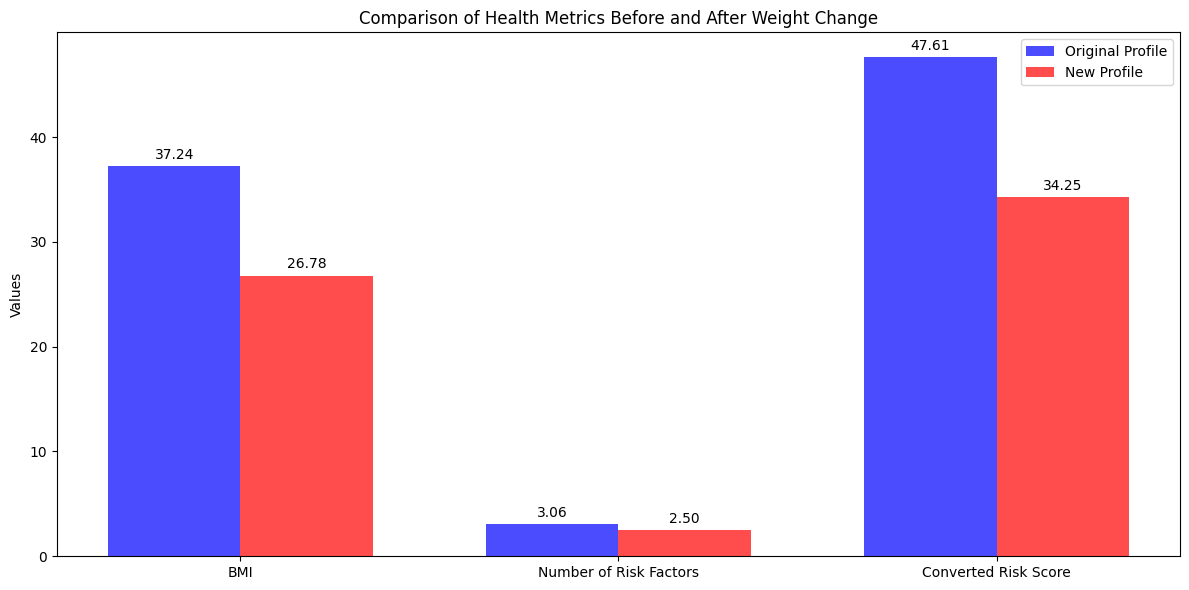


Percentage Changes:
Weight Change: -28.09%
BMI Change: -28.10%
Number of Risk Factors Change: -18.18%
Converted Risk Score Change: -28.06%


In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_risk_category(score):
    if pd.isna(score):
        return "Unable to determine (No matching cohort)"
    score = int(score)
    if score == 0:
        return "No Risk"
    elif 1 <= score <= 22:
        return "Low Risk"
    elif 23 <= score <= 44:
        return "Moderate Risk"
    elif 45 <= score <= 67:
        return "High Risk"
    else:
        return "Very High Risk"

def perform_cohort_analysis(gender, age, height, weight, bmi):
    user_bmi_rounded = round(bmi)
    
    cohort = df_adult[
        (df_adult['Gender'] == gender) &
        (df_adult['BMI_Rounded'].between(user_bmi_rounded - 1, user_bmi_rounded + 1)) &
        (df_adult['Age'].between(age - 1, age + 1))
    ]
    
    cohort_size = len(cohort)
    
    if cohort_size > 0:
        avg_health_risk_score = cohort['Health_Risk_Score'].mean()
        avg_converted_risk_score = cohort['Converted_Risk_Score'].mean()
        avg_risk_factors = cohort['Risk_Factors'].mean()
        risk_category = get_risk_category(avg_converted_risk_score)
    else:
        avg_health_risk_score = avg_converted_risk_score = avg_risk_factors = np.nan
        risk_category = "Unable to determine (No matching cohort)"
    
    return cohort_size, avg_health_risk_score, avg_converted_risk_score, risk_category, avg_risk_factors

# Original user data (from previous input)
print("Original Profile:")
print(f"Gender: {user_gender}")
print(f"Age: {user_age}")
print(f"Height: {height} inches")
print(f"Weight: {weight} pounds")
print(f"BMI: {user_bmi:.2f}")

cohort_size, avg_health_risk_score, avg_converted_risk_score, risk_category, avg_risk_factors = perform_cohort_analysis(user_gender, user_age, height, weight, user_bmi)

print(f"Number of comparables in cohort: {cohort_size}")
print(f"Average Health Risk Score: {avg_health_risk_score:.2f}")
print(f"Average Converted Risk Score: {avg_converted_risk_score:.2f}")
print(f"Risk Category: {risk_category}")
print(f"Average Number of Risk Factors: {avg_risk_factors:.2f}")

# Get weight change input from user
weight_change = float(input("\nEnter weight change (negative for loss, positive for gain) in pounds: "))

# Calculate new weight and BMI
new_weight = weight + weight_change
new_bmi = (new_weight / height ** 2) * 703

print("\nNew Profile After Weight Change:")
print(f"Gender: {user_gender}")
print(f"Age: {user_age}")
print(f"Height: {height} inches")
print(f"New Weight: {new_weight} pounds")
print(f"New BMI: {new_bmi:.2f}")

new_cohort_size, new_avg_health_risk_score, new_avg_converted_risk_score, new_risk_category, new_avg_risk_factors = perform_cohort_analysis(user_gender, user_age, height, new_weight, new_bmi)

print(f"Number of comparables in new cohort: {new_cohort_size}")
print(f"New Average Health Risk Score: {new_avg_health_risk_score:.2f}")
print(f"New Average Converted Risk Score: {new_avg_converted_risk_score:.2f}")
print(f"New Risk Category: {new_risk_category}")
print(f"New Average Number of Risk Factors: {new_avg_risk_factors:.2f}")

# Compare original and new profiles
print("\nComparison:")
print(f"Weight Change: {weight_change:.2f} pounds")
print(f"BMI Change: {new_bmi - user_bmi:.2f}")
print(f"Health Risk Score Change: {new_avg_health_risk_score - avg_health_risk_score:.2f}")
print(f"Converted Risk Score Change: {new_avg_converted_risk_score - avg_converted_risk_score:.2f}")
print(f"Risk Factor Change: {new_avg_risk_factors - avg_risk_factors:.2f}")

# Visualization
categories = ['BMI', 'Number of Risk Factors', 'Converted Risk Score']
original_values = [user_bmi, avg_risk_factors, avg_converted_risk_score]
new_values = [new_bmi, new_avg_risk_factors, new_avg_converted_risk_score]

x = range(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar([i - width/2 for i in x], original_values, width, label='Original Profile', color='blue', alpha=0.7)
rects2 = ax.bar([i + width/2 for i in x], new_values, width, label='New Profile', color='red', alpha=0.7)

ax.set_ylabel('Values')
ax.set_title('Comparison of Health Metrics Before and After Weight Change')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Calculate and display percentage changes
bmi_change_pct = ((new_bmi - user_bmi) / user_bmi) * 100
risk_factors_change_pct = ((new_avg_risk_factors - avg_risk_factors) / avg_risk_factors) * 100
converted_risk_score_change_pct = ((new_avg_converted_risk_score - avg_converted_risk_score) / avg_converted_risk_score) * 100

print("\nPercentage Changes:")
print(f"Weight Change: {(weight_change / weight) * 100:.2f}%")
print(f"BMI Change: {bmi_change_pct:.2f}%")
print(f"Number of Risk Factors Change: {risk_factors_change_pct:.2f}%")
print(f"Converted Risk Score Change: {converted_risk_score_change_pct:.2f}%")

#### **Conclusion**

This small project demonstrated the value of leveraging  metabolic profiles and related calculations in a synthetic dataset. This type of analysis greatly expands upon the binary Metabolic Syndrome classification. The potential of the Metabolic Syndrome variables is utilzed to a far greater extent than the simple binary classification model allows.  Changes to BMI status, number of risk factors and changes to the health risk score (along with a bar graph for visualization) are the chosen key metric points.  This is only one example of how individual metrics can be leveraged with comparison to large dataset profiles and related analysis. Additional profile predictions could include a large variety of metric comparisons and additional novel risk calculations associated with the data set. Similar analysis with real world datasets can be leveraged in a similar manner.  

